In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# Переменные, которые пока нужно убрать: id, name, host_id, host_name, last_review.
usecols = ['neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

# Численные признаки укладываются в 32 бита так что для уменьшения размера данных задам типы данных.
dtype = {'neighbourhood_group':np.unicode_,'neighbourhood':np.unicode_,'latitude':np.float32,'longitude':np.float32,'room_type':np.unicode_,'price':np.int32,'minimum_nights':np.int32,'number_of_reviews':np.int32,'reviews_per_month':np.float32,'calculated_host_listings_count':np.int32,'availability_365':np.int32}

df = pd.read_csv('E:/Data/AB_NYC_2019.csv', usecols=usecols, dtype=dtype)

In [3]:
## Проверим датафрейм по основным показателям

In [4]:
df.shape

(48895, 11)

In [5]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.647491,-73.972366,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.753620,-73.983772,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.809021,-73.941902,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.685139,-73.959763,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.798512,-73.943993,Entire home/apt,80,10,9,0.10,1,0


In [6]:
df.tail()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Brooklyn,Bedford-Stuyvesant,40.678532,-73.949951,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.701839,-73.933167,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.814751,-73.948669,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.757511,-73.991119,Shared room,55,1,0,NaN,6,2
48894,Manhattan,Hell's Kitchen,40.764042,-73.989326,Private room,90,7,0,NaN,1,23


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float32
 3   longitude                       48895 non-null  float32
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int32  
 6   minimum_nights                  48895 non-null  int32  
 7   number_of_reviews               48895 non-null  int32  
 8   reviews_per_month               38843 non-null  float32
 9   calculated_host_listings_count  48895 non-null  int32  
 10  availability_365                48895 non-null  int32  
dtypes: float32(3), int32(5), object(3)
memory usage: 2.6+ MB


In [8]:
## Проверим,есть ли дубликаты

In [9]:
df.duplicated().value_counts()

False    48895
dtype: int64

In [10]:
## Дубликатов нет

## Статистика

In [11]:
df.describe(percentiles=[.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
latitude,48895.0,40.730587,0.054555,40.499790,40.690102,40.723068,40.763115,40.804890,40.825644,40.864659,40.913059
longitude,48895.0,-73.969963,0.049468,-74.244423,-73.983070,-73.955681,-73.936275,-73.907806,-73.865775,-73.776922,-73.712990
price,48895.0,152.720687,240.154170,0.000000,69.000000,106.000000,175.000000,269.000000,355.000000,799.000000,10000.000000
minimum_nights,48895.0,7.029962,20.510550,1.000000,1.000000,3.000000,5.000000,28.000000,30.000000,45.000000,1250.000000
number_of_reviews,48895.0,23.274466,44.550582,0.000000,1.000000,5.000000,24.000000,70.000000,114.000000,214.000000,629.000000
reviews_per_month,38843.0,1.373218,1.680445,0.010000,0.190000,0.720000,2.020000,3.630000,4.640000,7.195800,58.500000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.000000,1.000000,1.000000,2.000000,5.000000,15.000000,232.000000,327.000000
availability_365,48895.0,112.781327,131.622289,0.000000,0.000000,45.000000,227.000000,337.000000,359.000000,365.000000,365.000000


In [12]:
 ##Есть бесплатное жильё
 ##Есть недоступное в течение всего года
 ##Есть всплеск по цене,возможно выбросы

In [13]:
## Проверим наличие пропусков в датафрейме

In [14]:
df.isnull().sum() 

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
## Много пропусков в данных 'reviews_per_month'.
## Они не так информативны как'number_of_reviews',поэтому NaN заменим на 0

In [16]:
df['reviews_per_month'].fillna(0, inplace=True)
df['reviews_per_month'].isna().sum()

0

## Построим гистограммы распределения


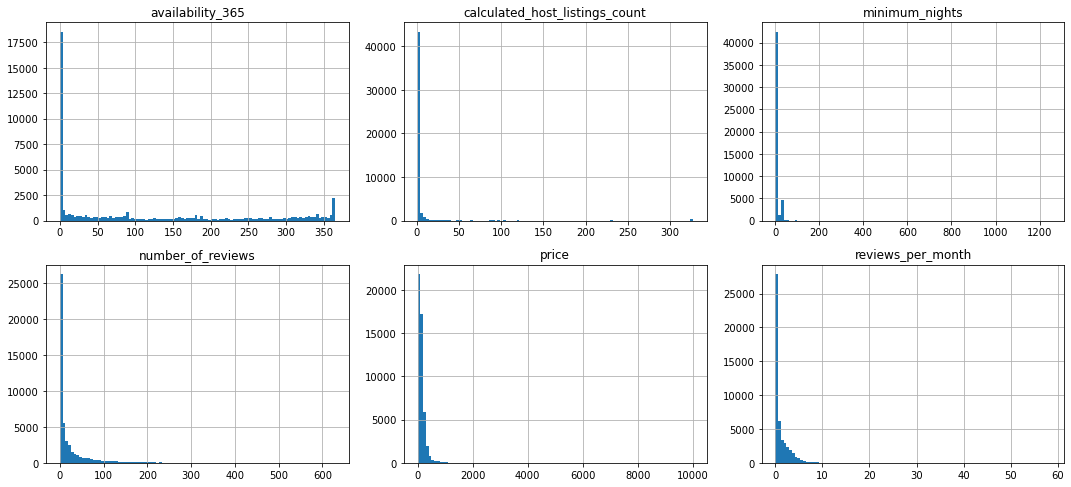

In [17]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
plt.tight_layout()
plt.show()

In [18]:
## Судя по гистограммам,распределения с тяжёлыми хвостами, данным требуется преобразование,нормализация

## Feature Engeneering

In [19]:
##Определяем выбросы через интерквартильное расстояние.

In [20]:
def outlier_detect_IQR(data, col, threshold=3):   
    
    IQR = df[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    params = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)
    outlier_index = tmp.any(axis=1)
    ovc = outlier_index.value_counts()
    if len(ovc) == 1:
        print('Выбросов нет')
    else:
        outlier_count = outlier_index.value_counts()[1]
        print('Количество выбросов в данных:', outlier_count)
        print('Доля выбросов:', f'{(100 * outlier_count / len(outlier_index)):.2f}%')
        print('Верхняя граница:', Upper_fence, '\nНижняя граница:', Lower_fence)
    return outlier_index, params

## Категориальные переменные

In [21]:
## Рассмотрим распределение цены в зависимости от категорий

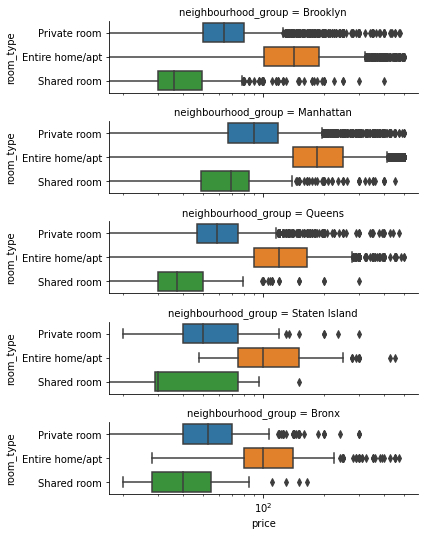

In [22]:
g = sns.catplot(x='price', y='room_type', row='neighbourhood_group', kind="box", orient="h", height=1.5, aspect=4, data=df[df['price'] < 500])
g.set(xscale="log")
plt.show()

## neighbourhood_group

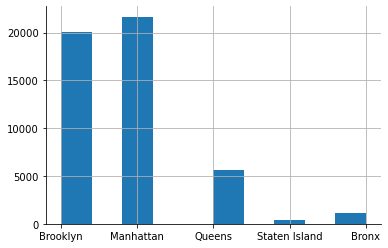

In [23]:
df['neighbourhood_group'].hist()
sns.despine()
plt.show()

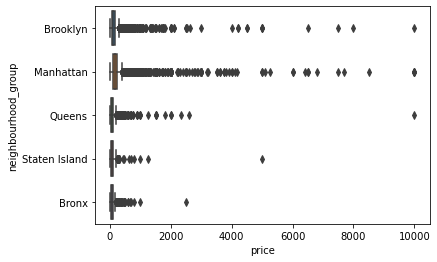

In [24]:
sns.boxplot(y="neighbourhood_group", x="price", data=df[['neighbourhood_group','price']]);

In [25]:
## Видны явные выбросы,рассмотрим их позже

## room_type 

In [26]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

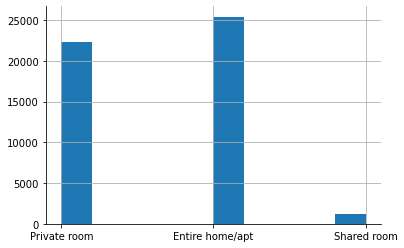

In [27]:
df['room_type'].hist()
sns.despine()
plt.show()

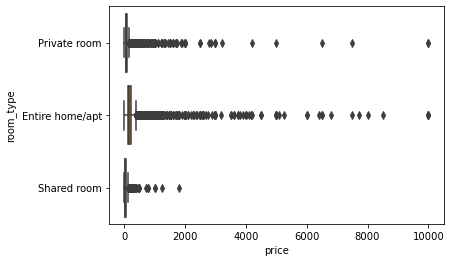

In [28]:
sns.boxplot(y="room_type", x="price", data=df[['room_type','price']]);

In [29]:
## Категорий немного,поэтому воспользуемся методом OHE,чтобы перевести их в числовые


In [30]:
df1 = pd.get_dummies(df, columns=['neighbourhood_group','room_type'], dtype=int)
df1.head(2)

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Kensington,40.647491,-73.972366,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,Midtown,40.753620,-73.983772,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0


## neighbourhood

In [31]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
New Dorp                 1
Willowbrook              1
Richmondtown             1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [32]:
## Слишком много категорий для OHE,получится много столбцов
## поэтому используем энкодинг значением

In [33]:
import category_encoders as ce

In [34]:
enc = ce.OrdinalEncoder(cols=['neighbourhood']).fit(df1)


In [35]:
df2 = enc.transform(df1)
df2.head(2)

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,40.647491,-73.972366,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2,40.753620,-73.983772,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0


In [36]:
## Проверим,что все данные - числовые
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   neighbourhood                      48895 non-null  int32  
 1   latitude                           48895 non-null  float32
 2   longitude                          48895 non-null  float32
 3   price                              48895 non-null  int32  
 4   minimum_nights                     48895 non-null  int32  
 5   number_of_reviews                  48895 non-null  int32  
 6   reviews_per_month                  48895 non-null  float32
 7   calculated_host_listings_count     48895 non-null  int32  
 8   availability_365                   48895 non-null  int32  
 9   neighbourhood_group_Bronx          48895 non-null  int32  
 10  neighbourhood_group_Brooklyn       48895 non-null  int32  
 11  neighbourhood_group_Manhattan      48895 non-null  int

## Непрерывные признаки

## Price-целевая переменная

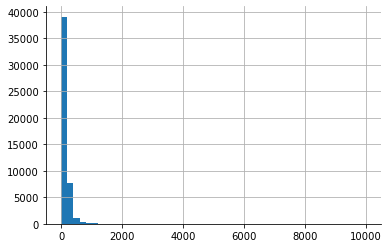

In [37]:
df2['price'].hist(bins=50)
sns.despine()
plt.show()

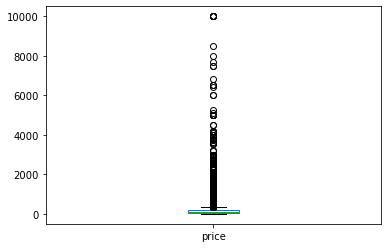

In [38]:
df2['price'].plot.box()
plt.show()

In [39]:
## Распределение с очень тяжёлым хвостом

In [40]:
## Анализ показал,что есть бесплатные апартаменты, проверим сколько их

In [41]:
df2[df2['price']==0]

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
23161,7,40.690231,-73.954277,0,4,1,0.05,4,28,0,1,0,0,0,0,1,0
25433,169,40.832958,-73.886681,0,2,55,2.56,4,127,1,0,0,0,0,0,1,0
25634,22,40.694672,-73.924332,0,2,16,0.71,5,0,0,1,0,0,0,0,1,0
25753,21,40.724621,-73.940720,0,2,12,0.53,2,0,0,1,0,0,0,0,1,0
25778,13,40.708382,-73.946449,0,5,3,0.15,1,73,0,1,0,0,0,1,0,0
25794,7,40.681728,-73.913422,0,1,93,4.28,6,176,0,1,0,0,0,0,1,0
25795,7,40.682789,-73.911697,0,1,95,4.37,6,232,0,1,0,0,0,0,1,0
25796,7,40.682579,-73.912842,0,1,95,4.35,6,222,0,1,0,0,0,0,1,0
26259,6,40.750912,-73.975967,0,3,0,0.00,1,0,0,0,1,0,0,1,0,0
26841,22,40.692108,-73.906700,0,30,2,0.11,6,333,0,1,0,0,0,0,0,1


In [42]:
## Похоже,это аномалии,можно удалить

In [43]:
df2.drop(df2.loc[df2['price']==0].index, inplace=True)

In [44]:
df2.shape

(48884, 17)

In [45]:
## Выбросы

In [46]:
index, params = outlier_detect_IQR(data=df2, col='price', threshold=5)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Количество выбросов в данных: 589
Доля выбросов: 1.20%
Верхняя граница: 705.0 
Нижняя граница: -461.0
Верхняя граница: 705.0 
Нижняя граница: -461.0


In [47]:
## Для удаления выбросов решил применить виндзоризацию

In [48]:
def windsorization(data, col, params, strategy='both'):
    """Заменяем все значения большие params[1] значением params[1], а значения меньше params[0] значением params[0].
    При ``strategy = both`` - заменяем снизу и сверху,
        ``strategy = top`` - заменяем только сверху,
        ``strategy = bottom`` - заменяем только снизу."""
    data_copy = data.copy(deep=True)  
    if strategy == 'both':
        data_copy.loc[data_copy[col] > params[0], col] = params[0]
        data_copy.loc[data_copy[col] < params[1], col] = params[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col] > params[0], col] = params[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col] < params[1], col] = params[1]  
    return data_copy

In [49]:
df3 = windsorization(data=df2, col='price', params=params, strategy='both')


In [50]:
## Посмотрим распределение после удаления выбросов

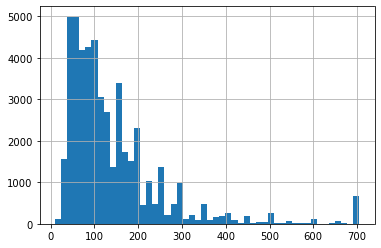

In [51]:
df3['price'].hist(bins=50,)

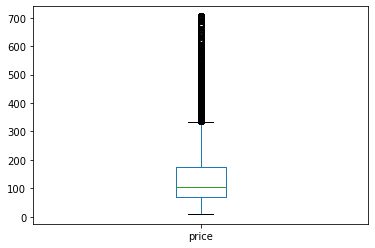

In [52]:
df3['price'].plot.box()
plt.show()

In [53]:
## Явно стало лучше

## minimum_nights

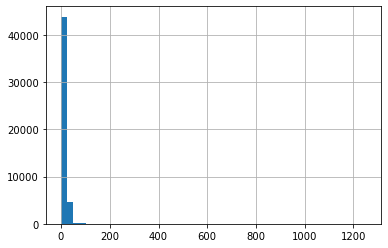

In [54]:
df2['minimum_nights'].hist(bins=50,)

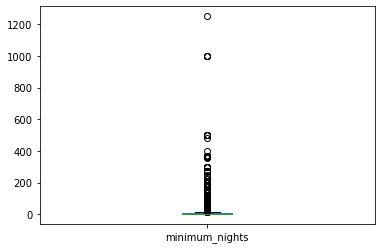

In [55]:
df2['minimum_nights'].plot.box()
plt.show()

In [56]:
## Выбросы

In [57]:
index, params = outlier_detect_IQR(data=df2, col='minimum_nights', threshold=7)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Количество выбросов в данных: 536
Доля выбросов: 1.10%
Верхняя граница: 33.0 
Нижняя граница: -27.0
Верхняя граница: 33.0 
Нижняя граница: -27.0


In [58]:
df3 = windsorization(data=df2, col='minimum_nights', params=params, strategy='both')

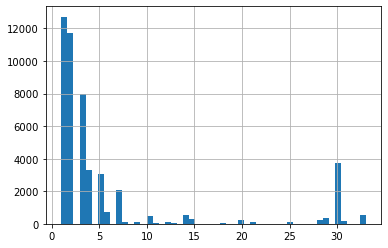

In [59]:
df3['minimum_nights'].hist(bins=50,)

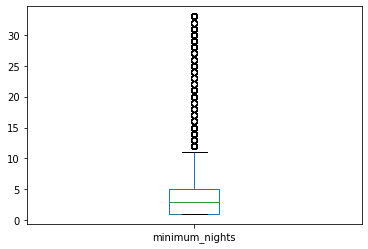

In [60]:
df3['minimum_nights'].plot.box()
plt.show()

## number_of_reviews

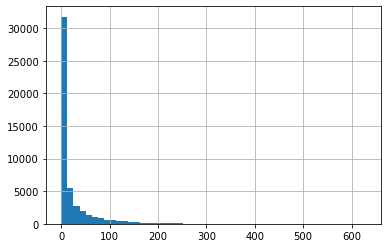

In [61]:
df2['number_of_reviews'].hist(bins=50,)

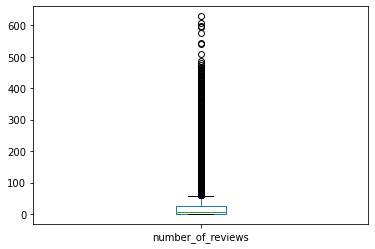

In [62]:
df2['number_of_reviews'].plot.box()
plt.show()

In [63]:
## Выбросы

In [64]:
index, params = outlier_detect_IQR(data=df2, col='number_of_reviews', threshold=5)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Количество выбросов в данных: 1611
Доля выбросов: 3.30%
Верхняя граница: 139.0 
Нижняя граница: -114.0
Верхняя граница: 139.0 
Нижняя граница: -114.0


In [65]:
df3 = windsorization(data=df2, col='number_of_reviews', params=params, strategy='both')

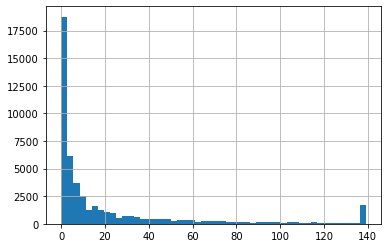

In [66]:
df3['number_of_reviews'].hist(bins=50,)

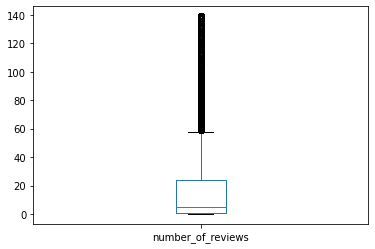

In [67]:
df3['number_of_reviews'].plot.box()
plt.show()

## reviews_per_month

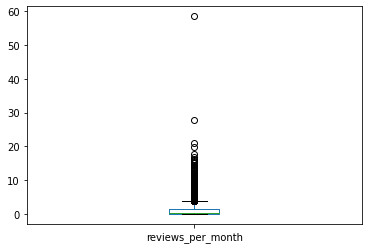

In [68]:
df2['reviews_per_month'].plot.box()
plt.show()

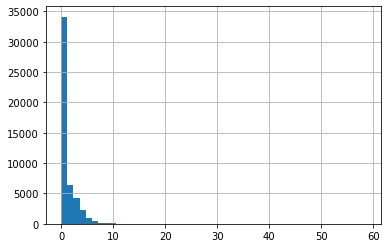

In [69]:
df2['reviews_per_month'].hist(bins=50,)

In [70]:
## Выбросы

In [71]:
index, params = outlier_detect_IQR(data=df2, col='reviews_per_month', threshold=7)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Количество выбросов в данных: 30
Доля выбросов: 0.06%
Верхняя граница: 12.360000349581242 
Нижняя граница: -10.740000307559967
Верхняя граница: 12.360000349581242 
Нижняя граница: -10.740000307559967


In [72]:
df3 = windsorization(data=df2, col='reviews_per_month', params=params, strategy='both')

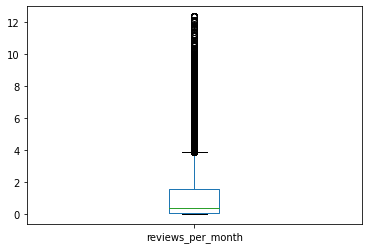

In [73]:
df3['reviews_per_month'].plot.box()
plt.show()

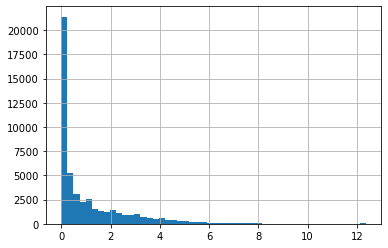

In [74]:
df3['reviews_per_month'].hist(bins=50,)

In [75]:
## Выбросов мало,распределение практически не изменилось

## calculated_host_listings_count

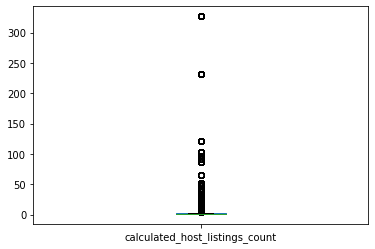

In [76]:
df2['calculated_host_listings_count'].plot.box()
plt.show()

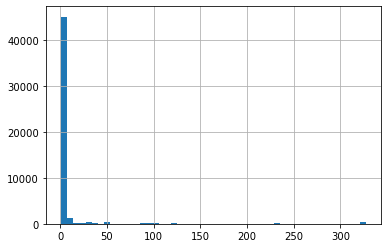

In [77]:
df2['calculated_host_listings_count'].hist(bins=50,)

In [78]:
## Выбросы

In [79]:
index, params = outlier_detect_IQR(data=df2, col='calculated_host_listings_count', threshold=5)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Количество выбросов в данных: 3827
Доля выбросов: 7.83%
Верхняя граница: 7.0 
Нижняя граница: -4.0
Верхняя граница: 7.0 
Нижняя граница: -4.0


In [80]:
df3 = windsorization(data=df2, col='calculated_host_listings_count', params=params, strategy='both')

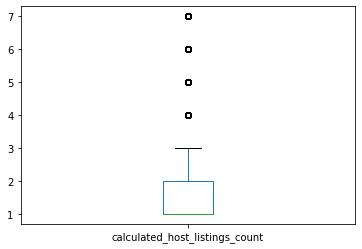

In [81]:
df3['calculated_host_listings_count'].plot.box()
plt.show()

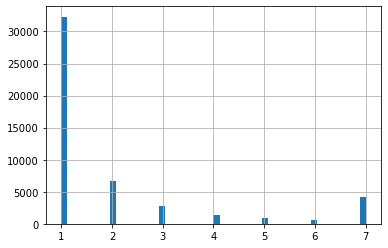

In [82]:
df3['calculated_host_listings_count'].hist(bins=50,)

In [83]:
## Также стало лучше 

## availability_365

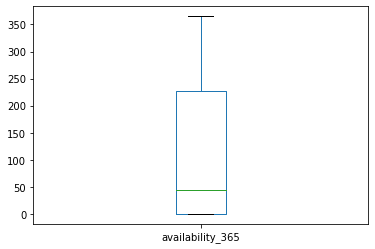

In [84]:
df2['availability_365'].plot.box()
plt.show()

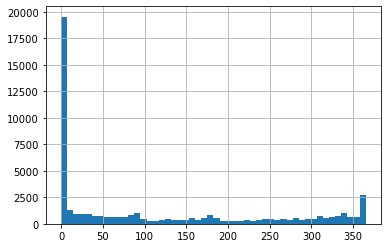

In [85]:
df2['availability_365'].hist(bins=50,)

In [86]:
index, params = outlier_detect_IQR(data=df2, col='availability_365', threshold=7)
print('Верхняя граница:', params[0], '\nНижняя граница:', params[1])

Выбросов нет
Верхняя граница: 1816.0 
Нижняя граница: -1589.0


## Расстояние до Манхэттена

In [87]:
## Добавим признак "Расстояние до Манхэттена"

In [88]:
from sklearn.metrics.pairwise import euclidean_distances

In [89]:
coords = ['latitude', 'longitude']
appt_coord = df2[coords]

In [90]:
# Координаты Манхэттена
manhattan = np.array([40.78343, -73.96625]).reshape(1, -1)
dist2mh = euclidean_distances(appt_coord, manhattan)
df3['dist2mh'] = dist2mh

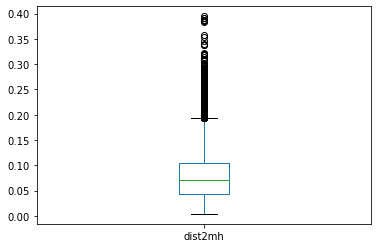

In [91]:
df3['dist2mh'].plot.box()
plt.show()

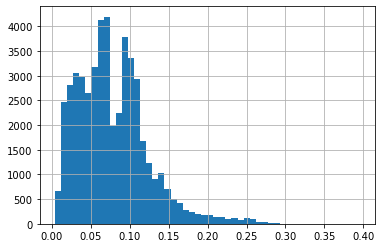

In [92]:
df3['dist2mh'].hist(bins=50,)

In [93]:
## Удалим лишние столбцы 'latitude', 'longitude'

In [94]:
df3.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [95]:
df3.head(2)

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,dist2mh
0,1,149,1,9,0.21,6.0,365,0,1,0,0,0,0,1,0,0.136076
1,2,225,1,45,0.38,2.0,355,0,0,1,0,0,1,0,0,0.034578


In [96]:
df3.shape

(48884, 16)

In [97]:
## Расчитаем корреляцию
corr = df3.corr()
corr

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,dist2mh
neighbourhood,1.000000,-0.054990,-0.028340,0.010777,0.098782,0.044162,0.124176,0.388756,-0.140125,-0.278041,0.406260,0.225395,-0.065329,0.051013,0.047535,0.532660
price,-0.054990,1.000000,0.042805,-0.047926,-0.050531,0.010502,0.081847,-0.040984,-0.098503,0.163897,-0.080262,-0.013853,0.255802,-0.240234,-0.053512,-0.121798
minimum_nights,-0.028340,0.042805,1.000000,-0.080080,-0.124870,0.159498,0.144275,-0.018160,-0.039688,0.067382,-0.032629,-0.009400,0.074927,-0.073772,-0.004522,-0.063544
number_of_reviews,0.010777,-0.047926,-0.080080,1.000000,0.589311,-0.013364,0.171975,0.009173,0.017359,-0.045758,0.035991,0.015094,-0.009992,0.017120,-0.023249,0.050590
reviews_per_month,0.098782,-0.050531,-0.124870,0.589311,1.000000,0.029021,0.163664,0.036295,-0.021591,-0.063650,0.107971,0.026659,-0.029449,0.030012,-0.001553,0.108802
calculated_host_listings_count,0.044162,0.010502,0.159498,-0.013364,0.029021,1.000000,0.425646,0.008606,-0.102168,0.060698,0.054820,0.014920,-0.093096,0.059224,0.111863,-0.008117
availability_365,0.124176,0.081847,0.144275,0.171975,0.163664,0.425646,1.000000,0.060825,-0.079736,-0.005387,0.087125,0.057890,-0.006744,-0.010974,0.058098,0.091611
neighbourhood_group_Bronx,0.388756,-0.040984,-0.018160,0.009173,0.036295,0.008606,0.060825,1.000000,-0.126170,-0.134704,-0.054681,-0.013242,-0.052001,0.042651,0.031139,0.092674
neighbourhood_group_Brooklyn,-0.140125,-0.098503,-0.039688,0.017359,-0.021591,-0.102168,-0.079736,-0.126170,1.000000,-0.745219,-0.302508,-0.073260,-0.073746,0.079395,-0.017777,0.438690
neighbourhood_group_Manhattan,-0.278041,0.163897,0.067382,-0.045758,-0.063650,0.060698,-0.005387,-0.134704,-0.745219,1.000000,-0.322968,-0.078215,0.159941,-0.157686,-0.008963,-0.671934


In [98]:
## Создадим heatmap

In [99]:
mask = np.triu(np.ones_like(corr, dtype=bool))


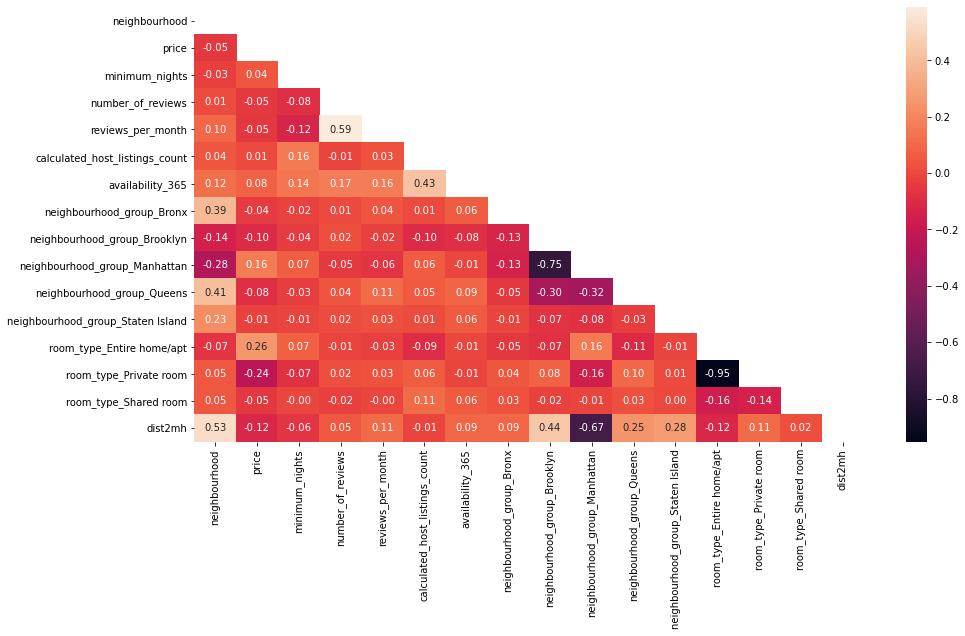

In [100]:
plt.figure(figsize=(15,8));
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask);

## ML

In [101]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics  # подгружаем метрики

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats

measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")    

""
error_type
MAE
RMSE
R2
MAPE


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop(['price'], axis=1), 
    df3['price'], 
    test_size=0.3
)

## baseline

In [103]:
# Сделаем самый простой baseline прогноз

In [104]:
y_median = np.median(y_train)                   
y_pred_naive = np.ones(len(y_test)) * y_median  
y_pred_naive[:5]

array([106., 106., 106., 106., 106.])

In [105]:
measured_metrics['naive_baseline'] = dataframe_metrics(y_test, y_pred_naive)

In [106]:
measured_metrics

,error_type,naive_baseline
0,MAE,85.579095
1,RMSE,249.858292
2,R2,-0.038413
3,MAPE,57.575081


In [107]:
# Что-то совсем плохо. Будем строить модели

## Linear model

In [108]:
## Отшкалируем переменные StandardScaler'ом

In [109]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)
X_test_scaled[X_train.columns] = scaler.transform(X_test)

In [110]:
X_train_scaled.head(2)

,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,dist2mh
39892,-0.834760,-0.283758,-0.500229,-0.060695,2.194704,1.921268,-0.150411,-0.835663,1.123343,-0.364138,-0.086991,0.962872,-0.918662,-0.154822,-1.183380
30104,-0.776882,-0.095948,-0.500229,-0.060695,-0.542716,-0.856448,-0.150411,1.196655,-0.890200,-0.364138,-0.086991,0.962872,-0.918662,-0.154822,0.400372


In [111]:
X_test_scaled.head(2)

,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,dist2mh
35298,-0.255977,-0.189853,-0.500229,-0.618520,-0.542716,-0.658584,-0.150411,1.196655,-0.890200,-0.364138,-0.086991,-1.038559,1.088539,-0.154822,0.696333
19574,-0.834760,1.077864,-0.522530,-0.680501,2.742188,1.403776,-0.150411,-0.835663,1.123343,-0.364138,-0.086991,0.962872,-0.918662,-0.154822,-0.993381


In [112]:
# Сделаем это с RobustScaler

In [113]:
rscaler = RobustScaler()

X_train_rscaled = X_train.copy()
X_test_rscaled = X_test.copy()

X_train_rscaled[X_train.columns] = rscaler.fit_transform(X_train)
X_test_rscaled[X_train.columns] = rscaler.transform(X_test)

In [114]:
X_train_rscaled.head(2)

,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,dist2mh
39892,-0.620690,-0.25,-0.173913,0.403846,5.0,1.420354,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.790957
30104,-0.551724,0.75,-0.173913,0.403846,0.0,-0.194690,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425429


In [115]:
# Сделаем это с MinMaxScaler

In [116]:
mscaler = MinMaxScaler()

X_train_mscaled = X_train.copy()
X_test_mscaled = X_test.copy()

X_train_mscaled[X_train.columns] = mscaler.fit_transform(X_train)
X_test_mscaled[X_train.columns] = mscaler.transform(X_test)


In [117]:
X_train_mscaled.head(2)

,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,dist2mh
39892,0.004545,0.000000,0.00159,0.017094,0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.050520
30104,0.013636,0.003203,0.00159,0.017094,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.237481


## LinearRegression 

In [118]:
# StandardScaler

In [119]:
Lr = LinearRegression()
Lr.fit(X_train_scaled, y_train)

LinearRegression()

In [120]:
measured_metrics['Lr'] = dataframe_metrics(y_test, Lr.predict(X_test_scaled))

In [121]:
measured_metrics

,error_type,naive_baseline,Lr
0,MAE,85.579095,75.212025
1,RMSE,249.858292,233.798603
2,R2,-0.038413,0.090785
3,MAPE,57.575081,55.588639


In [122]:
# Отобразим важность признаков

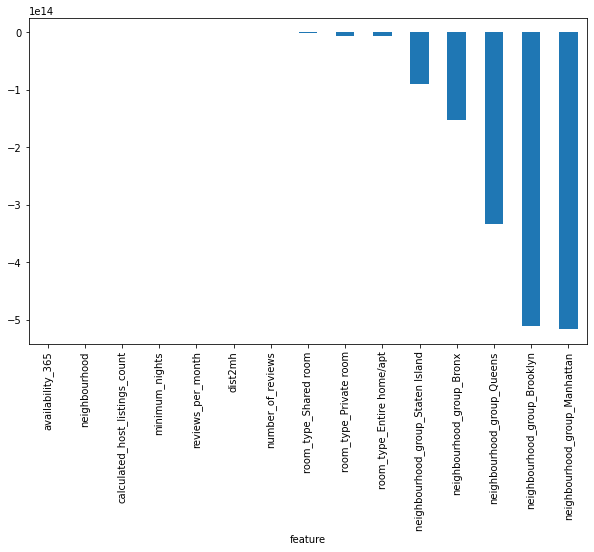

In [123]:
featureImportance = pd.DataFrame({"feature": X_train.columns[Lr.coef_!=0], 
                                  "importance": Lr.coef_[Lr.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [124]:
## Похоже,линейная регрессия не справилась,судя по графику

In [125]:
# RobustScaler

In [126]:
Lr = LinearRegression()
Lr.fit(X_train_rscaled, y_train)

LinearRegression()

In [127]:
measured_metrics['Lr'] = dataframe_metrics(y_test, Lr.predict(X_test_rscaled))

In [128]:
measured_metrics

,error_type,naive_baseline,Lr
0,MAE,85.579095,75.237109
1,RMSE,249.858292,233.791420
2,R2,-0.038413,0.090841
3,MAPE,57.575081,55.483700


In [129]:
# MinMaxScaler

In [130]:
Lr = LinearRegression()
Lr.fit(X_train_mscaled, y_train)

LinearRegression()

In [131]:
measured_metrics['Lr'] = dataframe_metrics(y_test, Lr.predict(X_test_mscaled))

In [132]:
measured_metrics

,error_type,naive_baseline,Lr
0,MAE,85.579095,75.207998
1,RMSE,249.858292,233.752188
2,R2,-0.038413,0.091146
3,MAPE,57.575081,55.603514


In [133]:
# Получше,но тоже не очень,видно,что все 3 метода шкалирования с нашим датафреймом работают почти одинаково
# остановимся на StandardScaler

## LassoCV

In [134]:
Ls = LassoCV()
Ls.fit(X_train_scaled, y_train)
measured_metrics['Ls'] = dataframe_metrics(y_test, Ls.predict(X_test_scaled))
measured_metrics

,error_type,naive_baseline,Lr,Ls
0,MAE,85.579095,75.207998,75.168203
1,RMSE,249.858292,233.752188,233.798333
2,R2,-0.038413,0.091146,0.090787
3,MAPE,57.575081,55.603514,55.401948


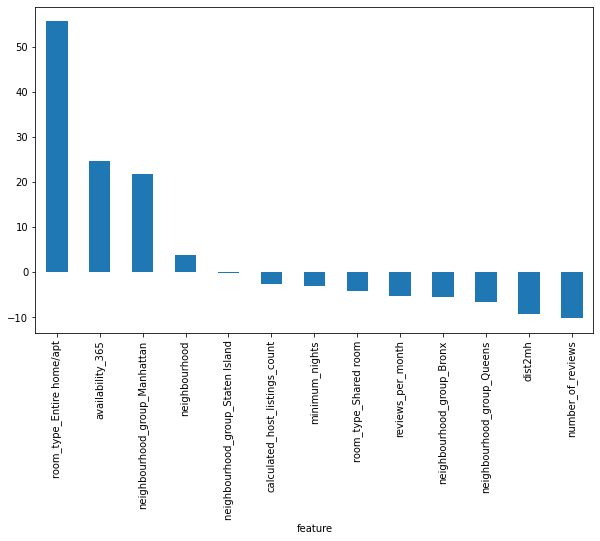

In [135]:
featureImportance = pd.DataFrame({"feature": X_train.columns[Ls.coef_!=0], 
                                  "importance": Ls.coef_[Ls.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [136]:
# На Лассо тоже не очень хорошие показатели,но график больше походит на правильный

## RidgeCV

In [137]:
ridge = RidgeCV()
ridge.fit(X_train_scaled, y_train)
measured_metrics['ridge'] = dataframe_metrics(y_test, ridge.predict(X_test_scaled))
measured_metrics

,error_type,naive_baseline,Lr,Ls,ridge
0,MAE,85.579095,75.207998,75.168203,75.234547
1,RMSE,249.858292,233.752188,233.798333,233.791567
2,R2,-0.038413,0.091146,0.090787,0.090840
3,MAPE,57.575081,55.603514,55.401948,55.481648


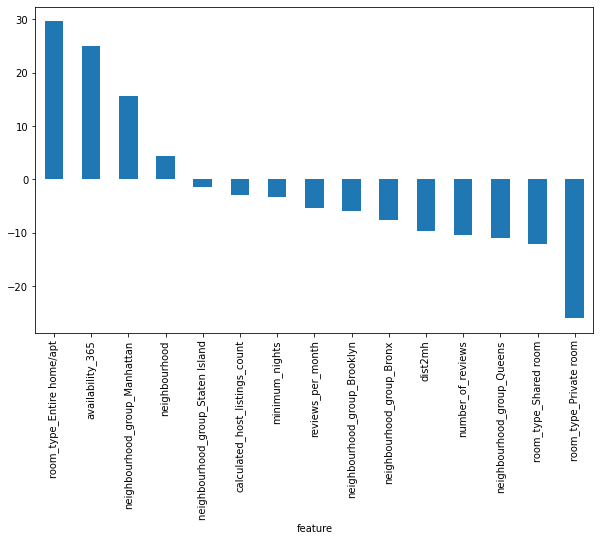

In [138]:
featureImportance = pd.DataFrame({"feature": X_train.columns[ridge.coef_!=0], 
                                  "importance": ridge.coef_[ridge.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [139]:
# Практически те же результаты

## ElasticNetCV

In [140]:
elastic = ElasticNetCV()
elastic.fit(X_train_scaled, y_train)
measured_metrics['elastic'] = dataframe_metrics(y_test, elastic.predict(X_test_scaled))
measured_metrics

,error_type,naive_baseline,Lr,Ls,ridge,elastic
0,MAE,85.579095,75.207998,75.168203,75.234547,74.767767
1,RMSE,249.858292,233.752188,233.798333,233.791567,233.841553
2,R2,-0.038413,0.091146,0.090787,0.090840,0.090451
3,MAPE,57.575081,55.603514,55.401948,55.481648,55.186342


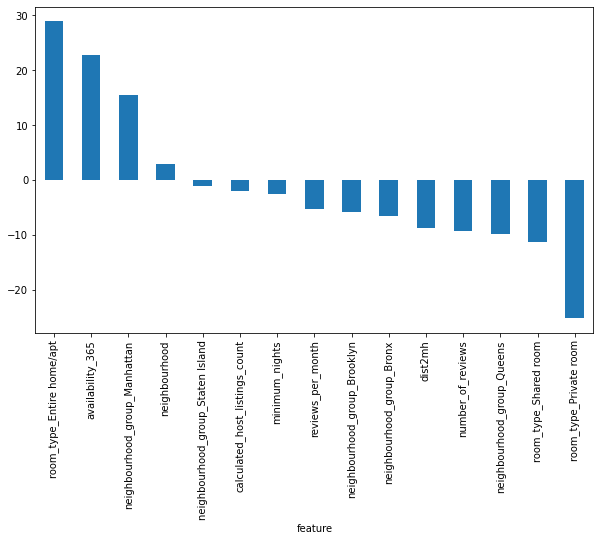

In [141]:
featureImportance = pd.DataFrame({"feature": X_train.columns[elastic.coef_!=0], 
                                  "importance": elastic.coef_[elastic.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [ ]:
Из всего вышепоказанного можно сделать след. выводы:
    1.Все модели дали не очень хорошие результаты, видимо следует использовать методы мне пока неизвестные,
      но чуть лучше показала себя Lasso регрессия.
    2. Три признака наиболее влияют на цену: отдельное жильё, срок аренды и близость к Манхэттену